# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        x0 = self.pos
        positions[0] = x0
        for i in range(1,n+1):
            x0 = x0 + self.pickStep()
            positions[i] = x0
        return positions

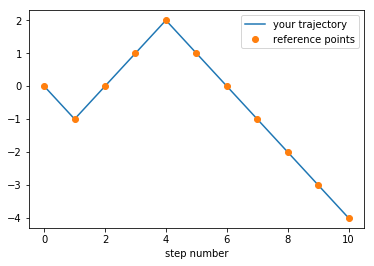

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

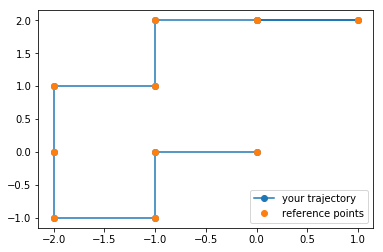

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

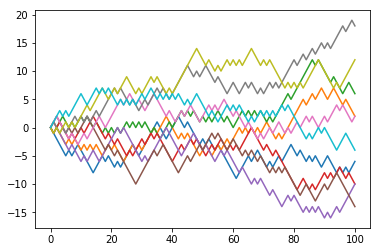

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


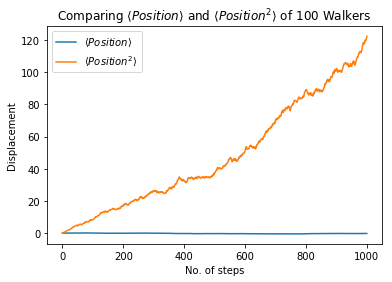

In [6]:
nsteps = 1000
ndim = 1
nwalkers = 100
xs = numpy.linspace(0,1000,1000)
w = walker(ndim)
hist = numpy.zeros((nsteps, nwalkers))
hist2 = numpy.zeros((nsteps, nwalkers))
avg = []
avg2 = []

b = numpy.zeros(nwalkers)
for j in range(0,nwalkers):
    c = w.doSteps(nsteps)
    
    for i in range(0,nsteps):
        hist[i][j] = c[i]
        hist2[i][j]  = c[i]**2
        
for k in range(0,nsteps):
    avg.append(sum(hist[k]/nsteps))
    avg2.append(sum(hist2[k]/nsteps))
    
    
plt.plot(xs, avg, label = r'$\langle Position \rangle$' )
plt.plot(xs, avg2, label = r'$\langle Position^{2} \rangle$')
plt.title("Comparing " r'$\langle Position \rangle$' " and " r'$\langle Position^{2} \rangle$' " of 100 Walkers")
plt.xlabel("No. of steps")
plt.ylabel("Displacement")
plt.legend()

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'Comparison of $\\langle Position^{2} \\rangle$ across different dimensions')

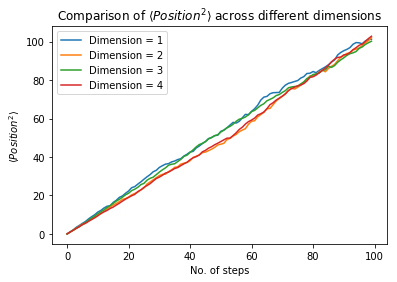

In [7]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
for d in dimensions:
    w= walker(0, ndim = dimensions[d-1],)
    avg2 = numpy.zeros(nsteps)
    a = numpy.zeros(d)
    hist2 = numpy.zeros((nsteps, nwalkers))
    for i in range(0, nwalkers):
        b = w.doSteps(nsteps)
        for j in range(0, nsteps):
            for k in range(0, d):
                a[k] = b[j][k]**2
                hist2[j][i] = sum(a)
    for l in range(0,nsteps):
        avg2[l] = (sum(hist2[l]/nwalkers))
    plt.plot(numpy.arange(0, nsteps, 1), avg2, label = "Dimension = {}".format(dimensions[d-1]))
        
plt.legend()
plt.xlabel("No. of steps")
plt.ylabel(r'$\langle Position^{2} \rangle$')
plt.title("Comparison of " r'$\langle Position^{2} \rangle$' " across different dimensions")
    

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


Text(0.5,1,'Simulating Diffusion of 1000 Gas Particles')

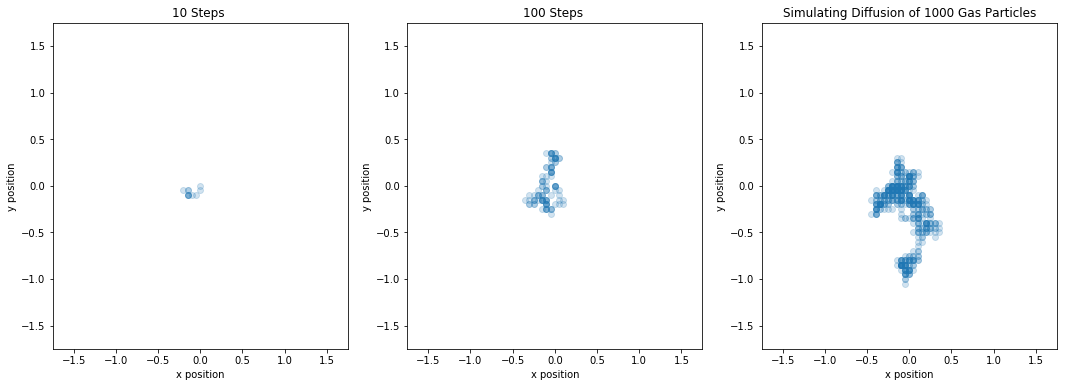

In [24]:
ndim=2
nwalkers=1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))
w =walker(0, ndim =2, step_size = 0.05)
# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-1.75, 1.75))
    plt.ylim((-1.75, 1.75))
    plt.title("{} Steps ".format(nsteps))
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.scatter(w.doSteps(nsteps)[:,0], w.doSteps(nsteps)[:,1], alpha=0.2)
plt.title("Simulating Diffusion of 1000 Gas Particles")